In [340]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml2022spring-hw1/covid.test.csv
/kaggle/input/ml2022spring-hw1/covid.train.csv


## 数据分析

In [341]:
import os
import pandas as pd

In [342]:
train_data=pd.read_csv("/kaggle/input/ml2022spring-hw1/covid.train.csv")

In [343]:
train_data.head(5)

,id,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,IL,IN,IA,KS,KY,LA,MD,MA,MI,MN,MS,MO,NE,NV,NJ,NM,NY,NC,OH,OK,OR,RI,SC,TX,UT,VA,WA,cli,ili,hh_cmnty_cli,nohh_cmnty_cli,wearing_mask,travel_outside_state,work_outside_home,shop,restaurant,spent_time,large_event,public_transit,anxious,depressed,worried_finances,tested_positive,cli.1,ili.1,hh_cmnty_cli.1,nohh_cmnty_cli.1,wearing_mask.1,travel_outside_state.1,work_outside_home.1,shop.1,restaurant.1,spent_time.1,large_event.1,public_transit.1,anxious.1,depressed.1,worried_finances.1,tested_positive.1,cli.2,ili.2,hh_cmnty_cli.2,nohh_cmnty_cli.2,wearing_mask.2,travel_outside_state.2,work_outside_home.2,shop.2,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,worried_finances.2,tested_positive.2,cli.3,ili.3,hh_cmnty_cli.3,nohh_cmnty_cli.3,wearing_mask.3,travel_outside_state.3,work_outside_home.3,shop.3,restaurant.3,spent_time.3,large_event.3,public_transit.3,anxious.3,depressed.3,worried_finances.3,tested_positive.3,cli.4,ili.4,hh_cmnty_cli.4,nohh_cmnty_cli.4,wearing_mask.4,travel_outside_state.4,work_outside_home.4,shop.4,restaurant.4,spent_time.4,large_event.4,public_transit.4,anxious.4,depressed.4,worried_finances.4,tested_positive.4
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.658466,0.724606,12.939284,8.556230,76.521693,7.863621,33.069066,64.129378,33.438714,40.539878,17.446499,3.993190,10.122837,7.841023,37.992365,7.374846,0.653157,0.713249,12.488933,8.219380,75.179558,8.083434,32.564654,65.212903,34.285572,40.697210,17.754941,3.997443,10.161621,8.067275,37.882278,7.219989,0.677783,0.737965,12.487637,8.135510,74.189695,8.001016,32.145331,66.258549,34.931095,40.889258,18.038068,3.970457,10.043014,7.983358,37.705024,7.077938,0.666751,0.723506,12.367718,8.006131,73.211902,7.873342,31.330236,66.753902,35.586606,40.741650,17.800711,3.984791,10.148898,8.262288,37.384963,7.452243,0.685628,0.740943,12.364307,8.151578,71.820231,7.944531,31.113209,67.394551,36.674291,40.743132,17.842221,4.093712,10.440071,8.627117,37.329512,7.456154
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.693287,0.675962,15.008467,11.091818,82.375469,11.082587,36.373964,60.471825,30.516978,43.162123,16.038761,4.519762,12.133287,10.155721,33.977549,9.850027,0.738029,0.720511,15.070049,10.990937,80.943299,10.596788,36.435828,61.653141,31.449290,43.751356,16.752518,4.385694,11.911724,9.798448,32.786802,10.050547,0.831586,0.827523,14.568504,10.578924,79.096391,10.418171,35.851804,62.835720,32.802637,43.753525,17.195922,4.671201,11.418314,10.600311,32.679030,10.388084,0.767643,0.763580,14.264862,10.212529,76.645984,10.614731,34.639961,63.652437,34.147714,44.682727,17.705140,4.938357,11.056725,10.889148,32.933142,8.707858,0.713255,0.719378,12.894363,8.919288,74.687112,10.523814,33.920257,64.398380,34.612238,44.035688,17.808103,4.924935,10.172662,9.954333,32.508881,8.010957
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.617041,0.617041,8.614719,5.238097,87.040999,15.569851,33.366362,58.819368,24.674416,36.678937,13.490946,6.639301,9.753290,7.691015,38.685771,3.897851,0.663597,0.635459,8.472831,5.154184,86.743467,15.915242,33.012910,60.157822,25.322821,36.456240,13.385945,6.700146,9.949982,7.833514,38.036480,3.083111,0.534394,0.497435,8.493353,5.125553,86.647289,15.963496,32.471093,60.910411,25.158967,35.968207,13.656070,6.748557,10.664876,7.975821,37.826924,3.132834,0.536224,0.498305,8.227657,5.298912,86.285798,15.788676,31.931642,61.233289,25.156025,36.032687,13.863302,6.879646,10.731187,7.847829,37.128714,3.444182,0.479111,0.432445,8.067909,5.333533,86.312419,16.477784,31.604604,62.101064,26.521875,36.746453,13.903667,7.313833,10.388712,7.956139,36.745588,2.906977
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.193768,1.272051,12.007656,7.219741,43.153686,20.972589,35.458649,69.833774,37.021123,48.022187,28.436903,4.083615,9.417865,9.385772,37.621189,10.297712,1.356577,1.432775,1

In [344]:
test_data=pd.read_csv("/kaggle/input/ml2022spring-hw1/covid.test.csv")
test_data.head(5)

,id,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,IL,IN,IA,KS,KY,LA,MD,MA,MI,MN,MS,MO,NE,NV,NJ,NM,NY,NC,OH,OK,OR,RI,SC,TX,UT,VA,WA,cli,ili,hh_cmnty_cli,nohh_cmnty_cli,wearing_mask,travel_outside_state,work_outside_home,shop,restaurant,spent_time,large_event,public_transit,anxious,depressed,worried_finances,tested_positive,cli.1,ili.1,hh_cmnty_cli.1,nohh_cmnty_cli.1,wearing_mask.1,travel_outside_state.1,work_outside_home.1,shop.1,restaurant.1,spent_time.1,large_event.1,public_transit.1,anxious.1,depressed.1,worried_finances.1,tested_positive.1,cli.2,ili.2,hh_cmnty_cli.2,nohh_cmnty_cli.2,wearing_mask.2,travel_outside_state.2,work_outside_home.2,shop.2,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,worried_finances.2,tested_positive.2,cli.3,ili.3,hh_cmnty_cli.3,nohh_cmnty_cli.3,wearing_mask.3,travel_outside_state.3,work_outside_home.3,shop.3,restaurant.3,spent_time.3,large_event.3,public_transit.3,anxious.3,depressed.3,worried_finances.3,tested_positive.3,cli.4,ili.4,hh_cmnty_cli.4,nohh_cmnty_cli.4,wearing_mask.4,travel_outside_state.4,work_outside_home.4,shop.4,restaurant.4,spent_time.4,large_event.4,public_transit.4,anxious.4,depressed.4,worried_finances.4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.710274,0.724032,14.561642,11.117583,52.905815,17.842008,31.733328,66.964202,31.863729,41.563975,18.757929,4.101058,11.745555,9.200281,31.232455,7.465515,0.655787,0.670090,14.312849,10.883053,53.632802,18.392039,32.009796,66.676857,31.912861,42.133776,18.800122,3.878775,11.858192,9.127592,30.700602,7.561836,0.779843,0.802076,15.217542,11.623847,55.007192,18.497708,33.000687,66.215625,31.782611,42.397610,18.760560,3.745753,12.902437,9.538124,31.337024,8.423512,0.765527,0.788473,15.840262,12.142336,56.413262,19.153466,32.686673,65.945659,31.699248,42.274692,18.465502,3.623784,13.008737,9.857105,31.347696,8.357021,0.692846,0.712477,15.936616,12.241230,57.509701,18.463415,32.470622,65.236954,31.730028,42.031183,18.188452,3.472105,12.452570,9.400024,30.550873
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.347450,0.346714,9.727842,6.300419,49.686001,22.680990,31.599276,61.308271,29.826095,40.833147,17.480809,6.674493,10.628595,6.729862,32.249644,6.807512,0.462280,0.453509,10.216577,6.968233,51.024665,23.056488,31.678939,61.180916,28.753107,40.665370,17.015020,6.461184,10.898060,7.044703,32.983522,6.490388,0.515629,0.506906,10.497930,7.155311,52.208179,24.360387,32.102060,60.163167,28.494685,40.704227,16.562653,6.364917,11.206494,7.223559,33.963705,6.872041,0.687033,0.697734,11.163712,7.868932,54.315909,23.572758,32.419781,60.108387,28.194897,40.136268,16.567779,6.162729,11.376842,7.155867,34.603368,9.318186,0.668739,0.679464,10.995437,8.030379,54.808565,24.201702,31.499036,60.360030,28.319417,39.919723,16.614292,5.992332,11.747528,7.438606,35.364871
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.655551,0.660840,11.519438,7.919253,50.658992,13.276638,28.923377,64.429955,30.377334,40.047315,16.241631,13.864530,12.905281,9.569775,37.417768,6.062231,0.635128,0.635128,11.514569,8.035914,51.245370,13.452431,28.578727,64.871154,30.588031,40.146444,16.352592,14.048134,13.061025,10.005939,37.606251,5.181086,0.563209,0.575010,11.500600,8.295961,51.644114,13.537471,29.117064,65.779317,31.079145,40.073858,16.539901,13.795196,13.043017,10.334899,36.776059,5.032925,0.605297,0.608920,11.135534,8.133172,52.486643,13.804978,28.984491,66.126427,31.299807,40.399527,16.783327,14.058799,13.129031,10.492896,36.670282,5.040143,0.588866,0.592042,11.414773,8.389935,53.322176,13.742657,28.696996,66.114428,31.211381,40.448538,16.998722,13.951631,12.898089,10.214711,37.028705
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.877624,0.924874,18.057030,14.794566,61.153680,13.903389,27.536333,65.410381,29.107429,41.124830,13.881023,5.055974,14.355803,10.489910,31.290344,9.069323,0.904217,0.943838,18.314449,15.116528,61.70565

- Tested Positive Cases(1):tested positive(this is what we want to predict)
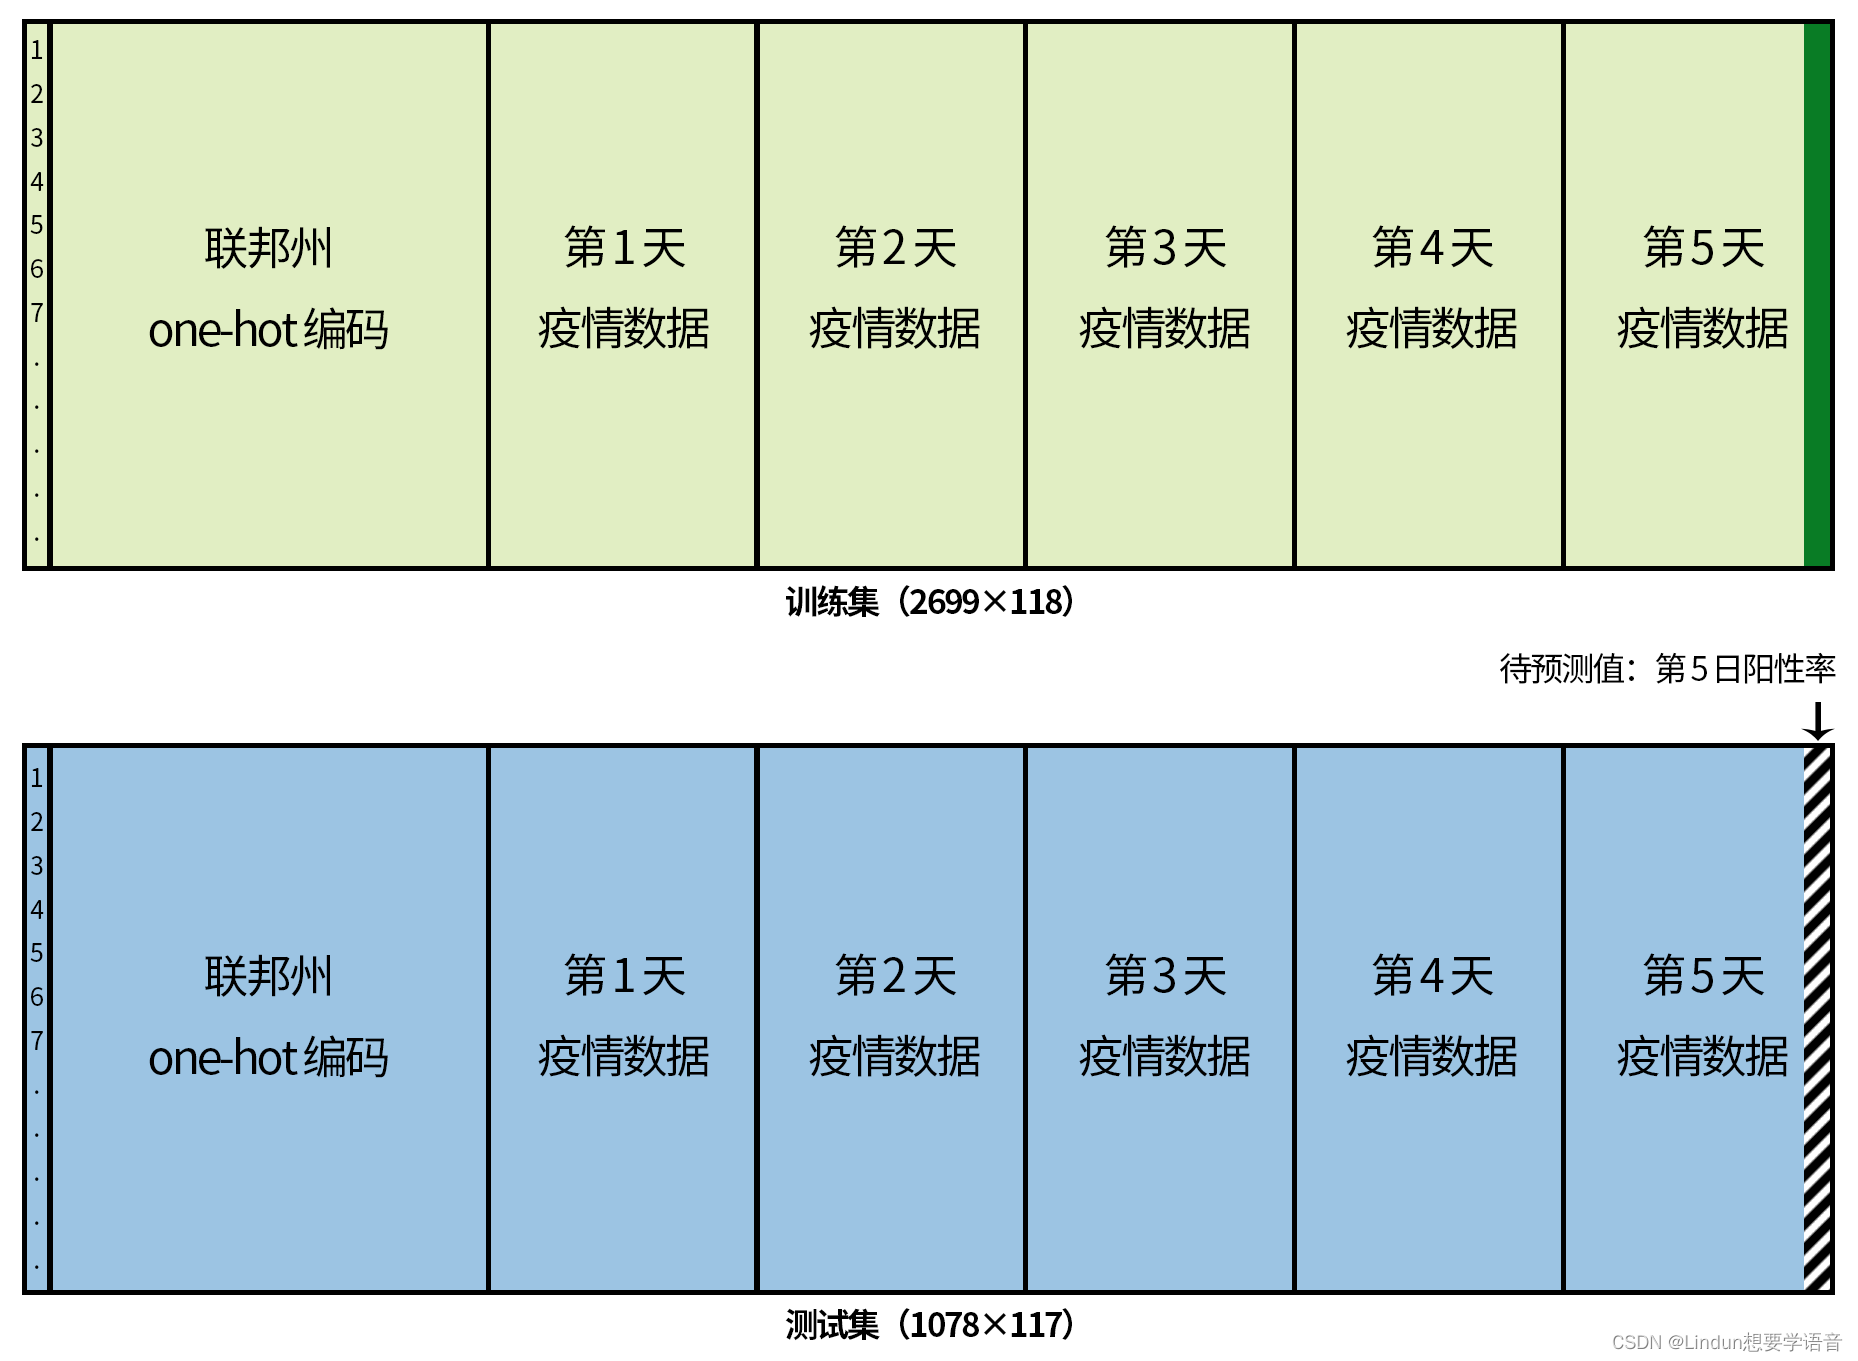

训练集包含 2699 条（行）数据，每条数据有 118 个（列）属性，包括：

- 1 列数据 id
- 37 列联邦州的 one-hot 编码点（即将每个联邦州作为一个属性维度，每条数据所属的联邦州数值为 1，其他联邦州数值为 0，这种做法常用在处理非数值型的数据标签）
- 5 个连续的日期 × 每日的 18 个公共卫生相关特征（例如医疗运转、社交限制、心理健康等），其中，每天的最后一个公共卫生特征为当日阳性率。


### 分析数据元素相关性

In [345]:
## 删除已经知道的无意义的列id
train_data.drop(columns=['id'],inplace=True)

In [346]:
pd.options.display.max_rows=40
pd.options.display.max_columns=None
train_data.info

<bound method DataFrame.info of       AL  AK  AZ  AR  CA  CO  CT  FL  GA  ID  IL  IN  IA  KS  KY  LA  MD  MA  \
0      0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   
1      0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   
2      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3      0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4      0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
2694   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   
2695   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2696   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2697   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2698   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

      M

In [347]:
# 查看数据类型
train_data.dtypes

AL                      int64
AK                      int64
AZ                      int64
AR                      int64
CA                      int64
                       ...   
public_transit.4      float64
anxious.4             float64
depressed.4           float64
worried_finances.4    float64
tested_positive.4     float64
Length: 117, dtype: object

- 需要预测的列为col_pre,col_pre=['tested_positive','tested_positive.1','tested_positive.2', 'tested_positive.3','tested_positive.4']

In [348]:
col_pre = [col for col in train_data.columns if 'tested_positive' in col]
col_pre

['tested_positive',
 'tested_positive.1',
 'tested_positive.2',
 'tested_positive.3',
 'tested_positive.4']

In [349]:
# 查找列名为'cli'的索引位置
index_of_cli = train_data.columns.get_loc("cli")
print(index_of_cli)
index_of_tested_positive = train_data.columns.get_loc("tested_positive")
print(index_of_tested_positive)

37
52


### 判断每列参数是否是正态分布

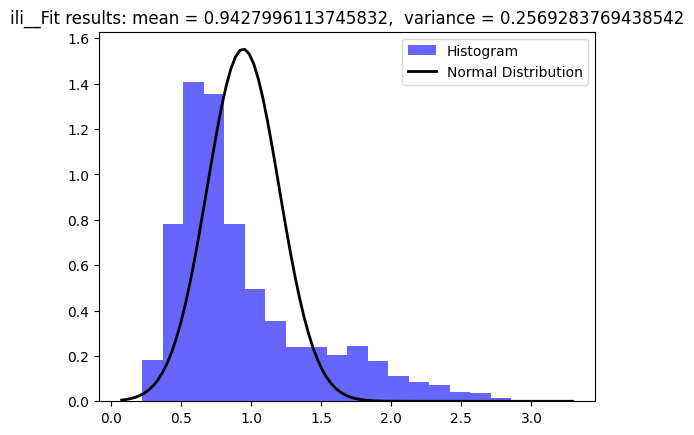

ili数据不符合正态分布


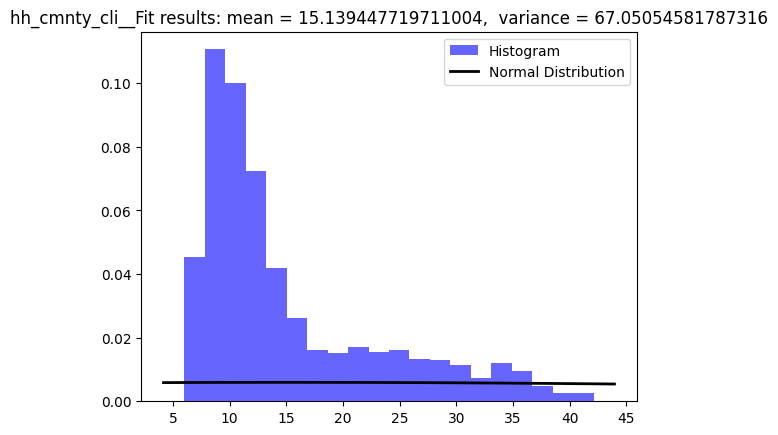

hh_cmnty_cli数据不符合正态分布


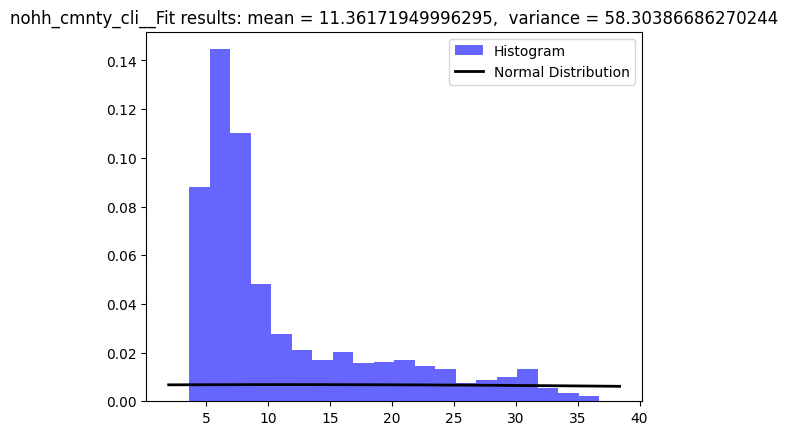

nohh_cmnty_cli数据不符合正态分布


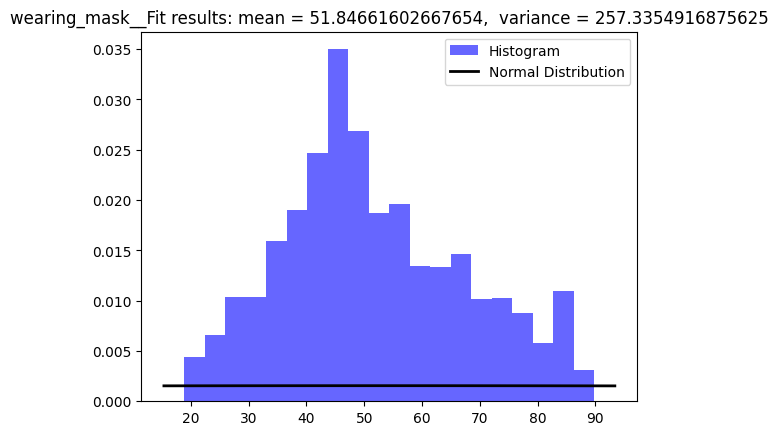

wearing_mask数据不符合正态分布


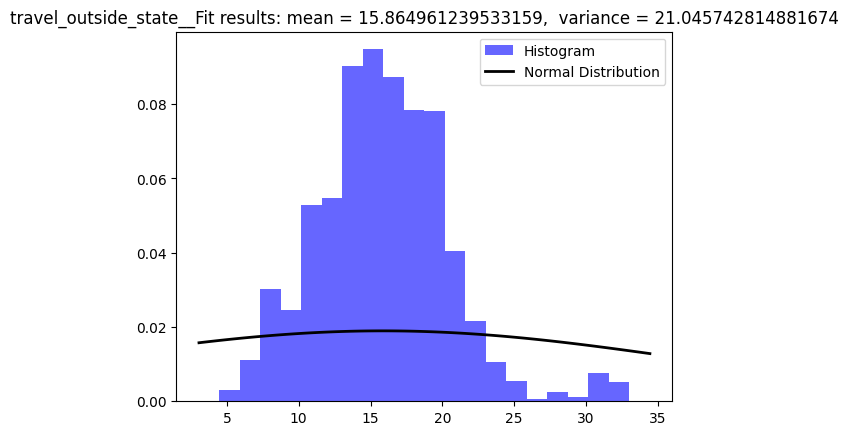

travel_outside_state数据不符合正态分布


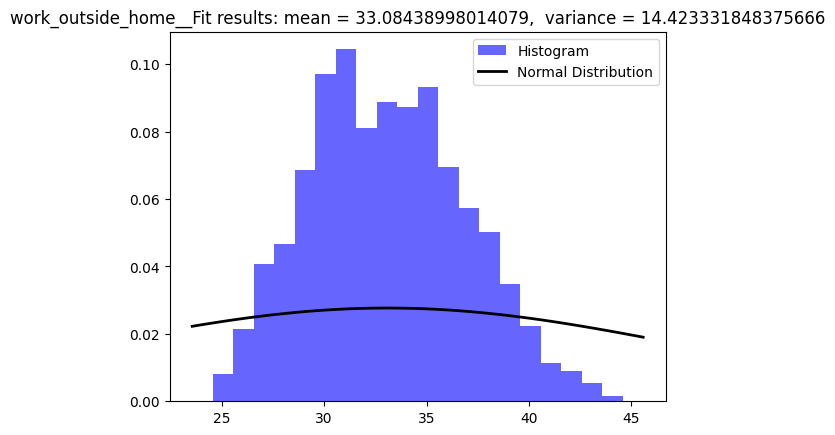

work_outside_home数据不符合正态分布


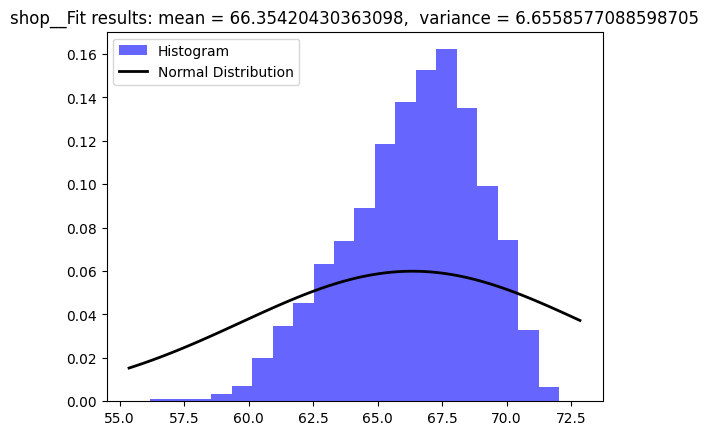

shop数据不符合正态分布


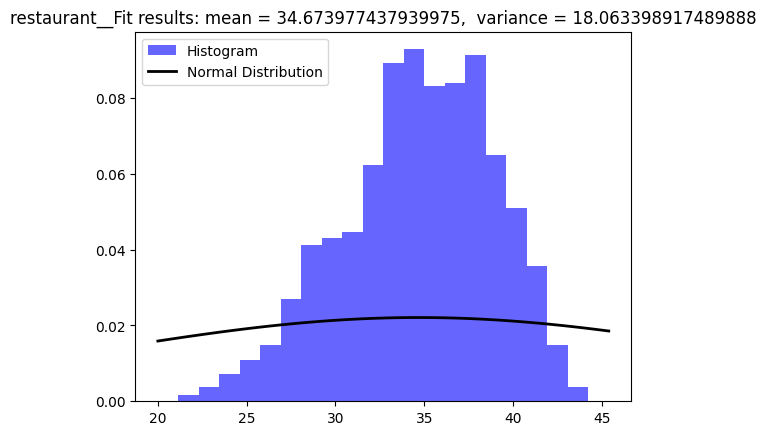

restaurant数据不符合正态分布


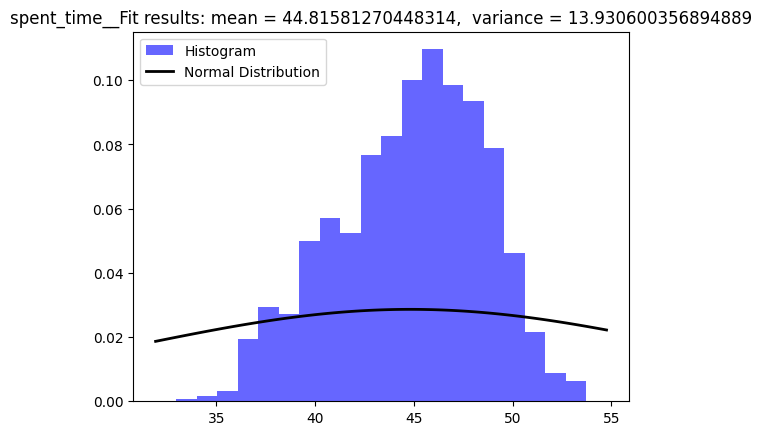

spent_time数据不符合正态分布


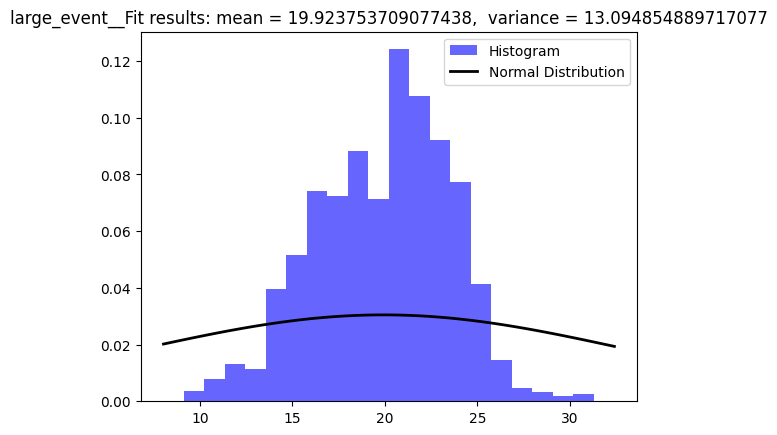

large_event数据不符合正态分布


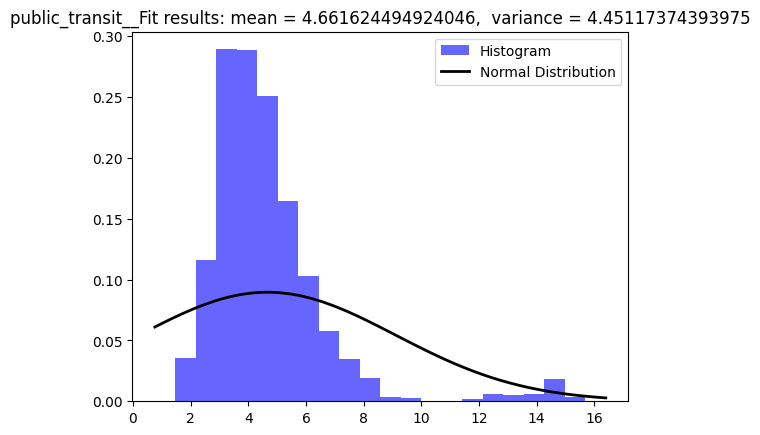

public_transit数据不符合正态分布


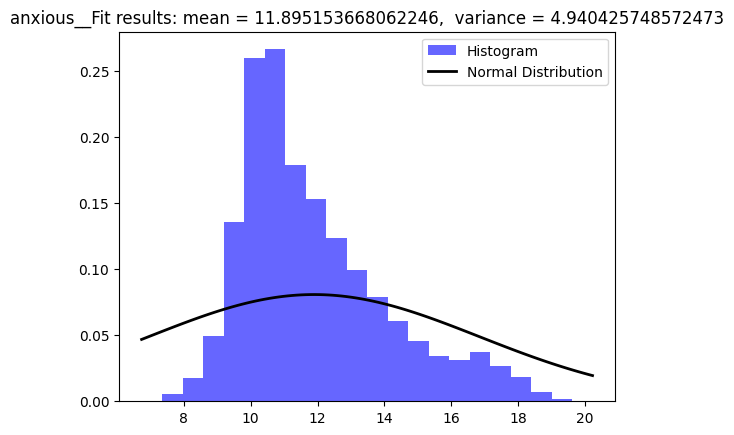

anxious数据不符合正态分布


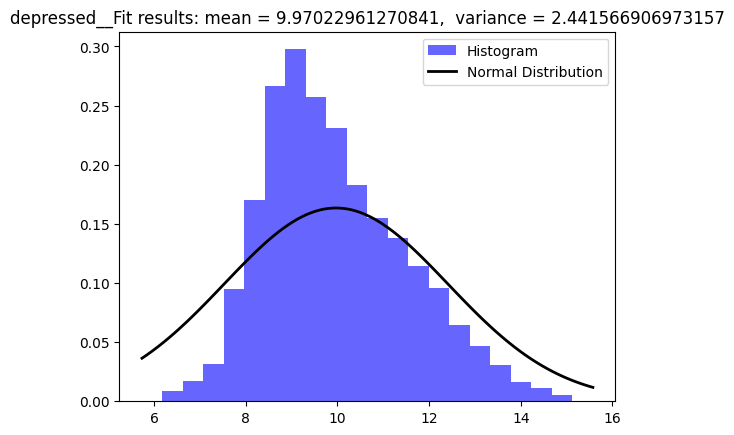

depressed数据不符合正态分布


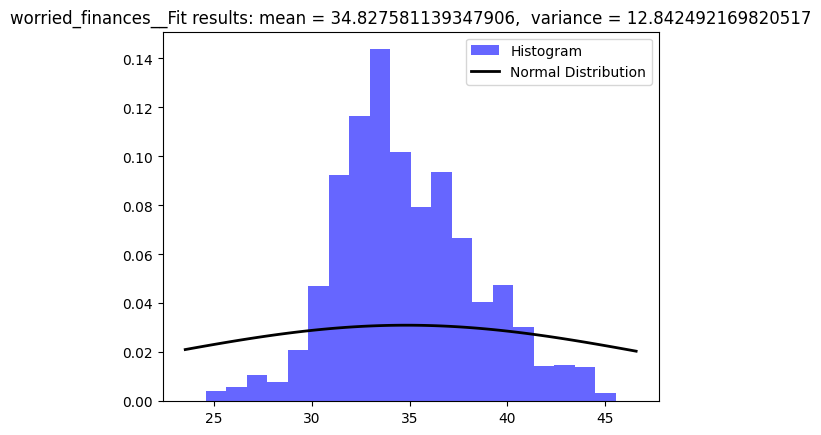

worried_finances数据不符合正态分布


In [350]:
import matplotlib.pyplot as plt
from scipy import stats

column_index = range(38,52)

df=train_data.copy()


for i in column_index:
    
    # 计算方差和均值
    variance = df.iloc[:,i].var()
    mean = df.iloc[:,i].mean()

    # 绘制直方图
    plt.hist(df.iloc[:,i], bins=20, density=True, alpha=0.6, color='b', label='Histogram')

    # 绘制正态分布曲线
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, variance)
    plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

    title = f"{df.columns[i]}__Fit results: mean = {mean},  variance = {variance}" 
    plt.title(title)

    plt.legend()
    plt.show()
    # 使用正态性检验，例如 Shapiro-Wilk 测试
    shapiro_test_statistic, shapiro_p_value = stats.shapiro(df.iloc[:,i])
    if shapiro_p_value < 0.05:
        print(f'{df.columns[i]}数据不符合正态分布')
    else:
        print(f'{df.columns[i]}数据符合正态分布')

In [351]:
for i in column_index:
    df[df.columns[i]] = df[df.columns[i]] / df[df.columns[i]].std()
df

,AL,AK,AZ,AR,CA,CO,CT,FL,GA,ID,IL,IN,IA,KS,KY,LA,MD,MA,MI,MN,MS,MO,NE,NV,NJ,NM,NY,NC,OH,OK,OR,RI,SC,TX,UT,VA,WA,cli,ili,hh_cmnty_cli,nohh_cmnty_cli,wearing_mask,travel_outside_state,work_outside_home,shop,restaurant,spent_time,large_event,public_transit,anxious,depressed,worried_finances,tested_positive,cli.1,ili.1,hh_cmnty_cli.1,nohh_cmnty_cli.1,wearing_mask.1,travel_outside_state.1,work_outside_home.1,shop.1,restaurant.1,spent_time.1,large_event.1,public_transit.1,anxious.1,depressed.1,worried_finances.1,tested_positive.1,cli.2,ili.2,hh_cmnty_cli.2,nohh_cmnty_cli.2,wearing_mask.2,travel_outside_state.2,work_outside_home.2,shop.2,restaurant.2,spent_time.2,large_event.2,public_transit.2,anxious.2,depressed.2,worried_finances.2,tested_positive.2,cli.3,ili.3,hh_cmnty_cli.3,nohh_cmnty_cli.3,wearing_mask.3,travel_outside_state.3,work_outside_home.3,shop.3,restaurant.3,spent_time.3,large_event.3,public_transit.3,anxious.3,depressed.3,worried_finances.3,tested_positive.3,cli.4,ili.4,hh_cmnty_cli.4,nohh_cmnty_cli.4,wearing_mask.4,travel_outside_state.4,work_outside_home.4,shop.4,restaurant.4,spent_time.4,large_event.4,public_transit.4,anxious.4,depressed.4,worried_finances.4,tested_positive.4
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.658466,1.429538,1.580189,1.120556,4.770180,1.714117,8.707413,24.857361,7.867737,10.861693,4.821231,1.892704,4.554284,5.018089,10.601606,7.374846,0.653157,0.713249,12.488933,8.219380,75.179558,8.083434,32.564654,65.212903,34.285572,40.697210,17.754941,3.997443,10.161621,8.067275,37.882278,7.219989,0.677783,0.737965,12.487637,8.135510,74.189695,8.001016,32.145331,66.258549,34.931095,40.889258,18.038068,3.970457,10.043014,7.983358,37.705024,7.077938,0.666751,0.723506,12.367718,8.006131,73.211902,7.873342,31.330236,66.753902,35.586606,40.741650,17.800711,3.984791,10.148898,8.262288,37.384963,7.452243,0.685628,0.740943,12.364307,8.151578,71.820231,7.944531,31.113209,67.394551,36.674291,40.743132,17.842221,4.093712,10.440071,8.627117,37.329512,7.456154
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.693287,1.333571,1.832885,1.452627,5.135090,2.415789,9.577625,23.439647,7.180287,11.564261,4.432211,2.142290,5.458789,6.499447,9.481289,9.850027,0.738029,0.720511,15.070049,10.990937,80.943299,10.596788,36.435828,61.653141,31.449290,43.751356,16.752518,4.385694,11.911724,9.798448,32.786802,10.050547,0.831586,0.827523,14.568504,10.578924,79.096391,10.418171,35.851804,62.835720,32.802637,43.753525,17.195922,4.671201,11.418314,10.600311,32.679030,10.388084,0.767643,0.763580,14.264862,10.212529,76.645984,10.614731,34.639961,63.652437,34.147714,44.682727,17.705140,4.938357,11.056725,10.889148,32.933142,8.707858,0.713255,0.719378,12.894363,8.919288,74.687112,10.523814,33.920257,64.398380,34.612238,44.035688,17.808103,4.924935,10.172662,9.954333,32.508881,8.010957
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.617041,1.217328,1.052059,0.686001,5.425928,3.393926,8.785694,22.799133,5.805600,9.827246,3.728139,3.146915,4.388024,4.922088,10.795098,3.897851,0.663597,0.635459,8.472831,5.154184,86.743467,15.915242,33.012910,60.157822,25.322821,36.456240,13.385945,6.700146,9.949982,7.833514,38.036480,3.083111,0.534394,0.497435,8.493353,5.125553,86.647289,15.963496,32.471093,60.910411,25.158967,35.968207,13.656070,6.748557,10.664876,7.975821,37.826924,3.132834,0.536224,0.498305,8.227657,5.298912,86.285798,15.788676,31.931642,61.233289,25.156025,36.032687,13.863302,6.879646,10.731187,7.847829,37.128714,3.444182,0.479111,0.432445,8.067909,5.333533,86.312419,16.477784,31.604604,62.101064,26.521875,36.746453,13.903667,7.313833,10.388712,7.956139,36.745588,2.906977
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.193768,2.509565,1.466416,0.945525,2.690098,4.571618,9.336614,27.068457,8.710636,12.866399,7.858360,1.935564,4.237115,6.006696,10.498031,10.297712,1.356577,1.432775,12.997184,7.843776,42.700646,21.298728,3

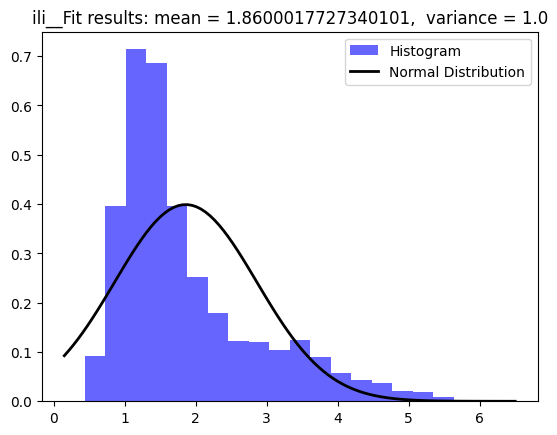

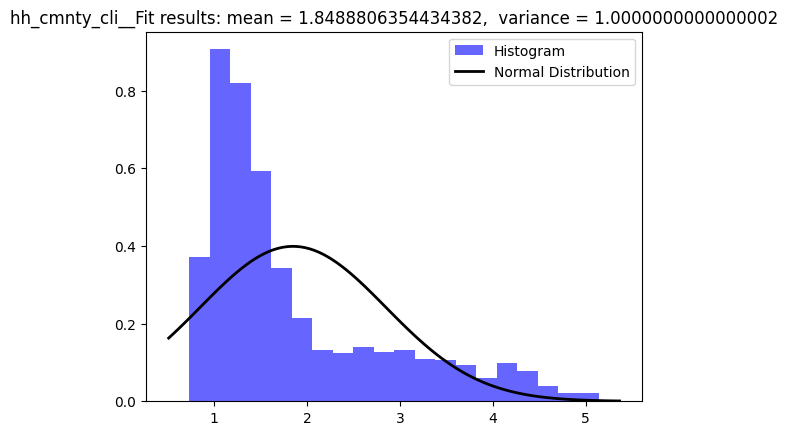

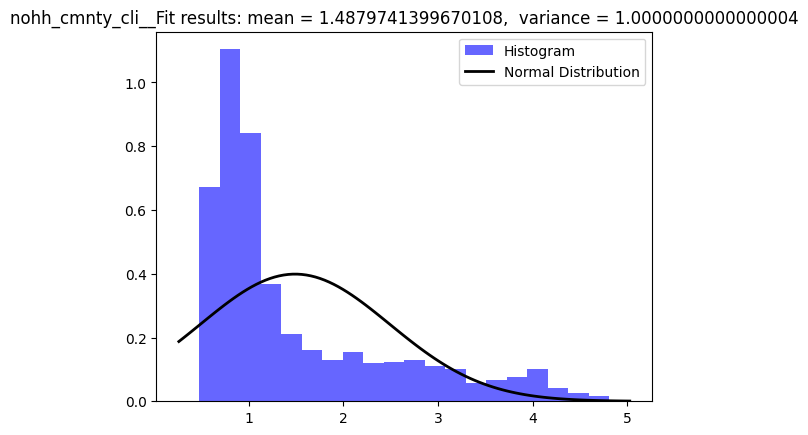

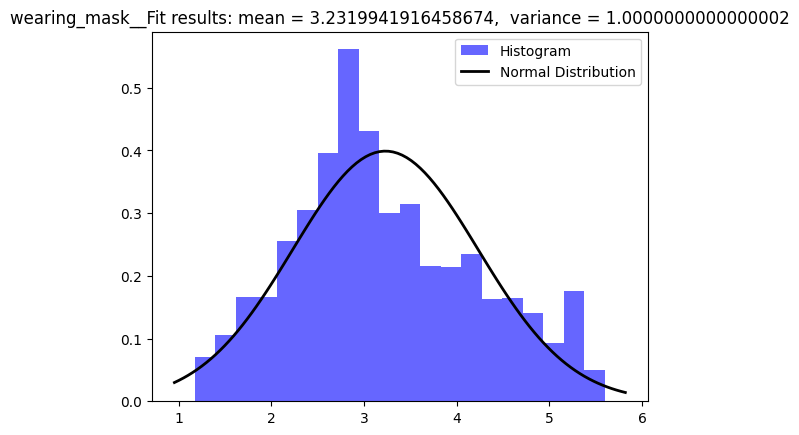

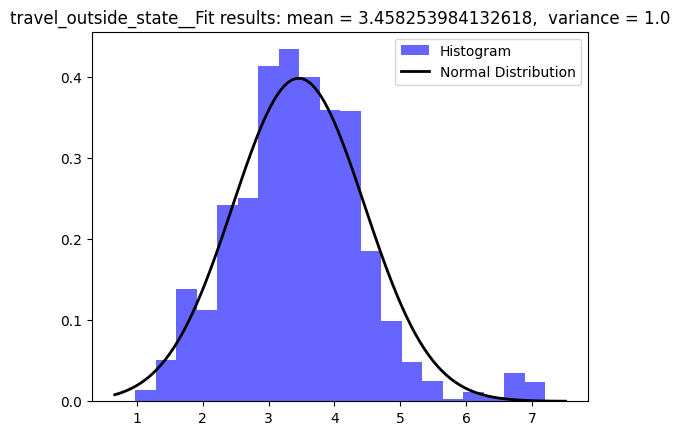

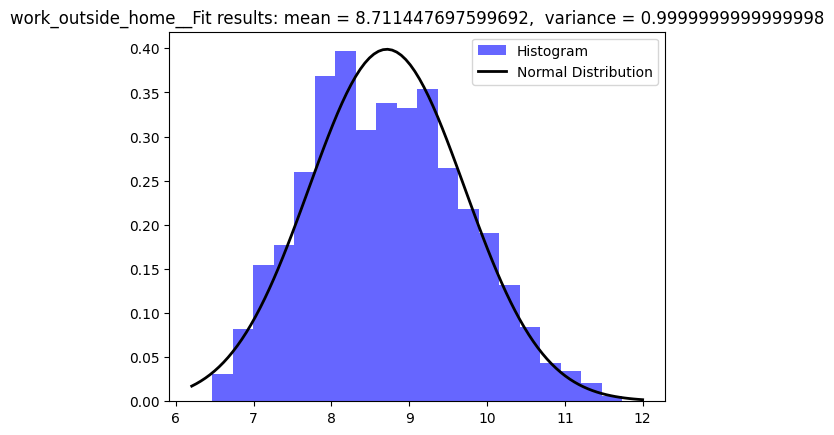

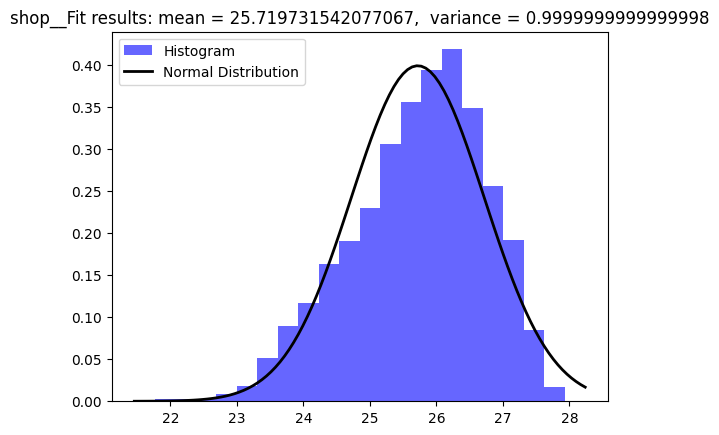

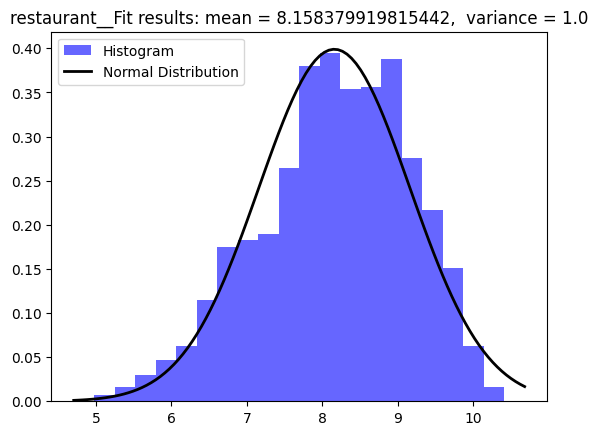

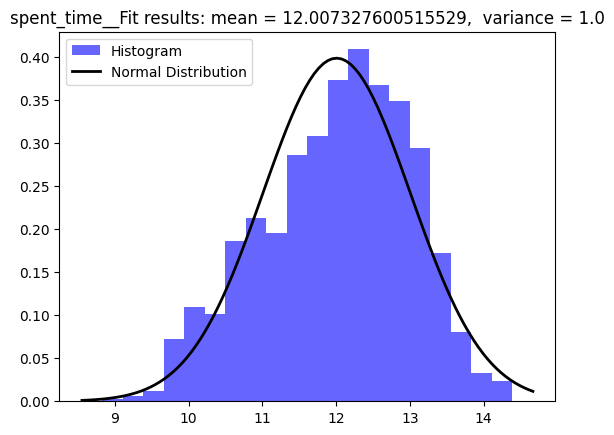

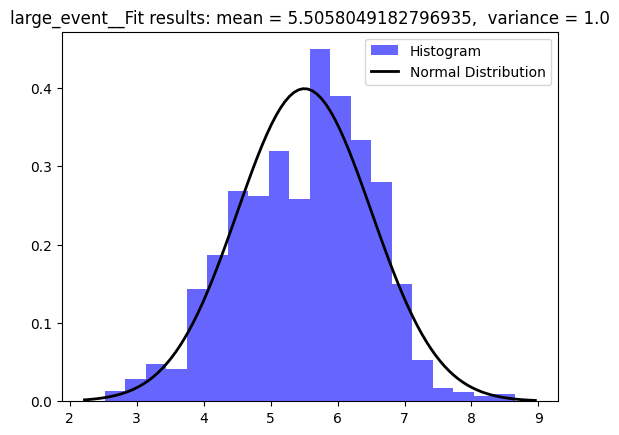

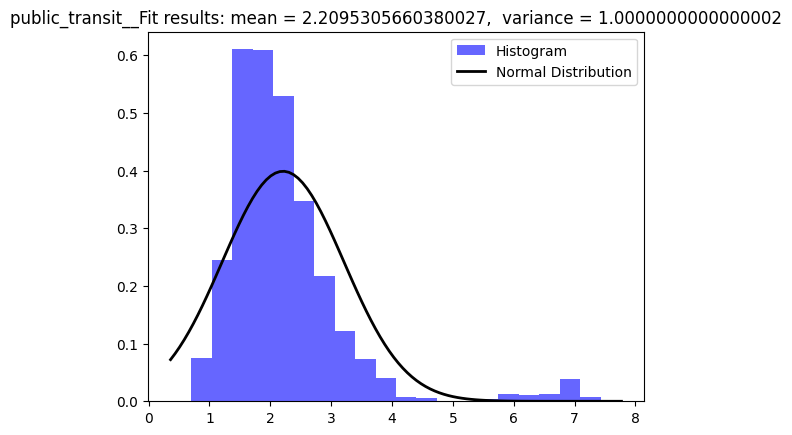

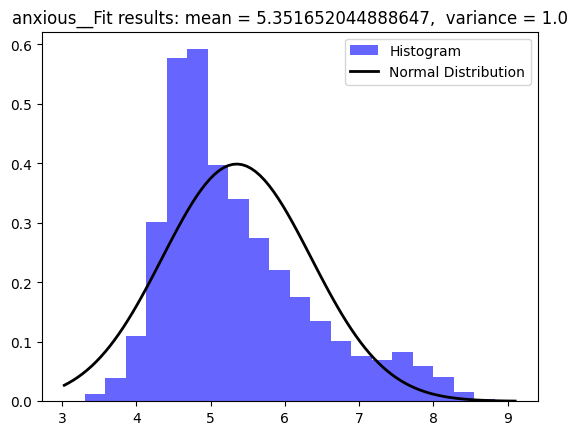

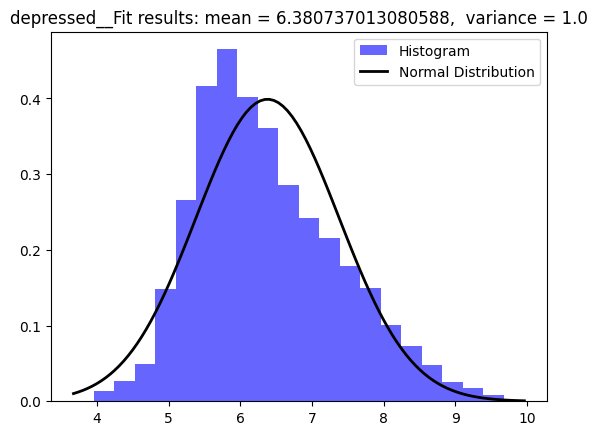

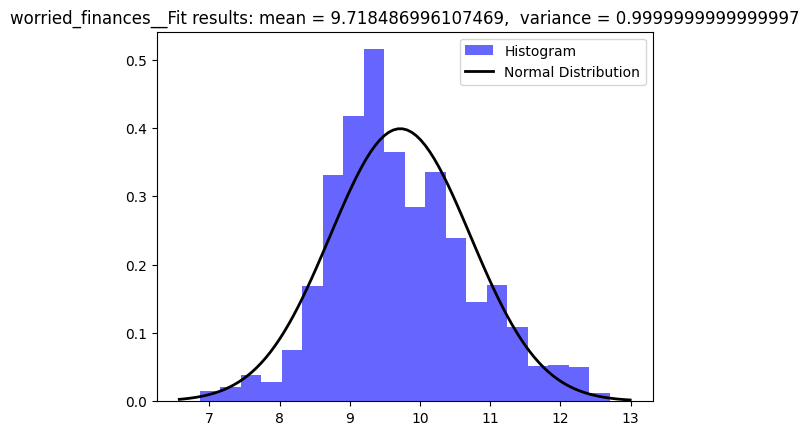

In [352]:
for i in column_index:
    
    # 计算方差和均值
    variance = df.iloc[:,i].var()
    mean = df.iloc[:,i].mean()

    # 绘制直方图
    plt.hist(df.iloc[:,i], bins=20, density=True, alpha=0.6, color='b', label='Histogram')

    # 绘制正态分布曲线
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, variance)
    plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

    title = f"{df.columns[i]}__Fit results: mean = {mean},  variance = {variance}" 
    plt.title(title)

    plt.legend()
    plt.show()

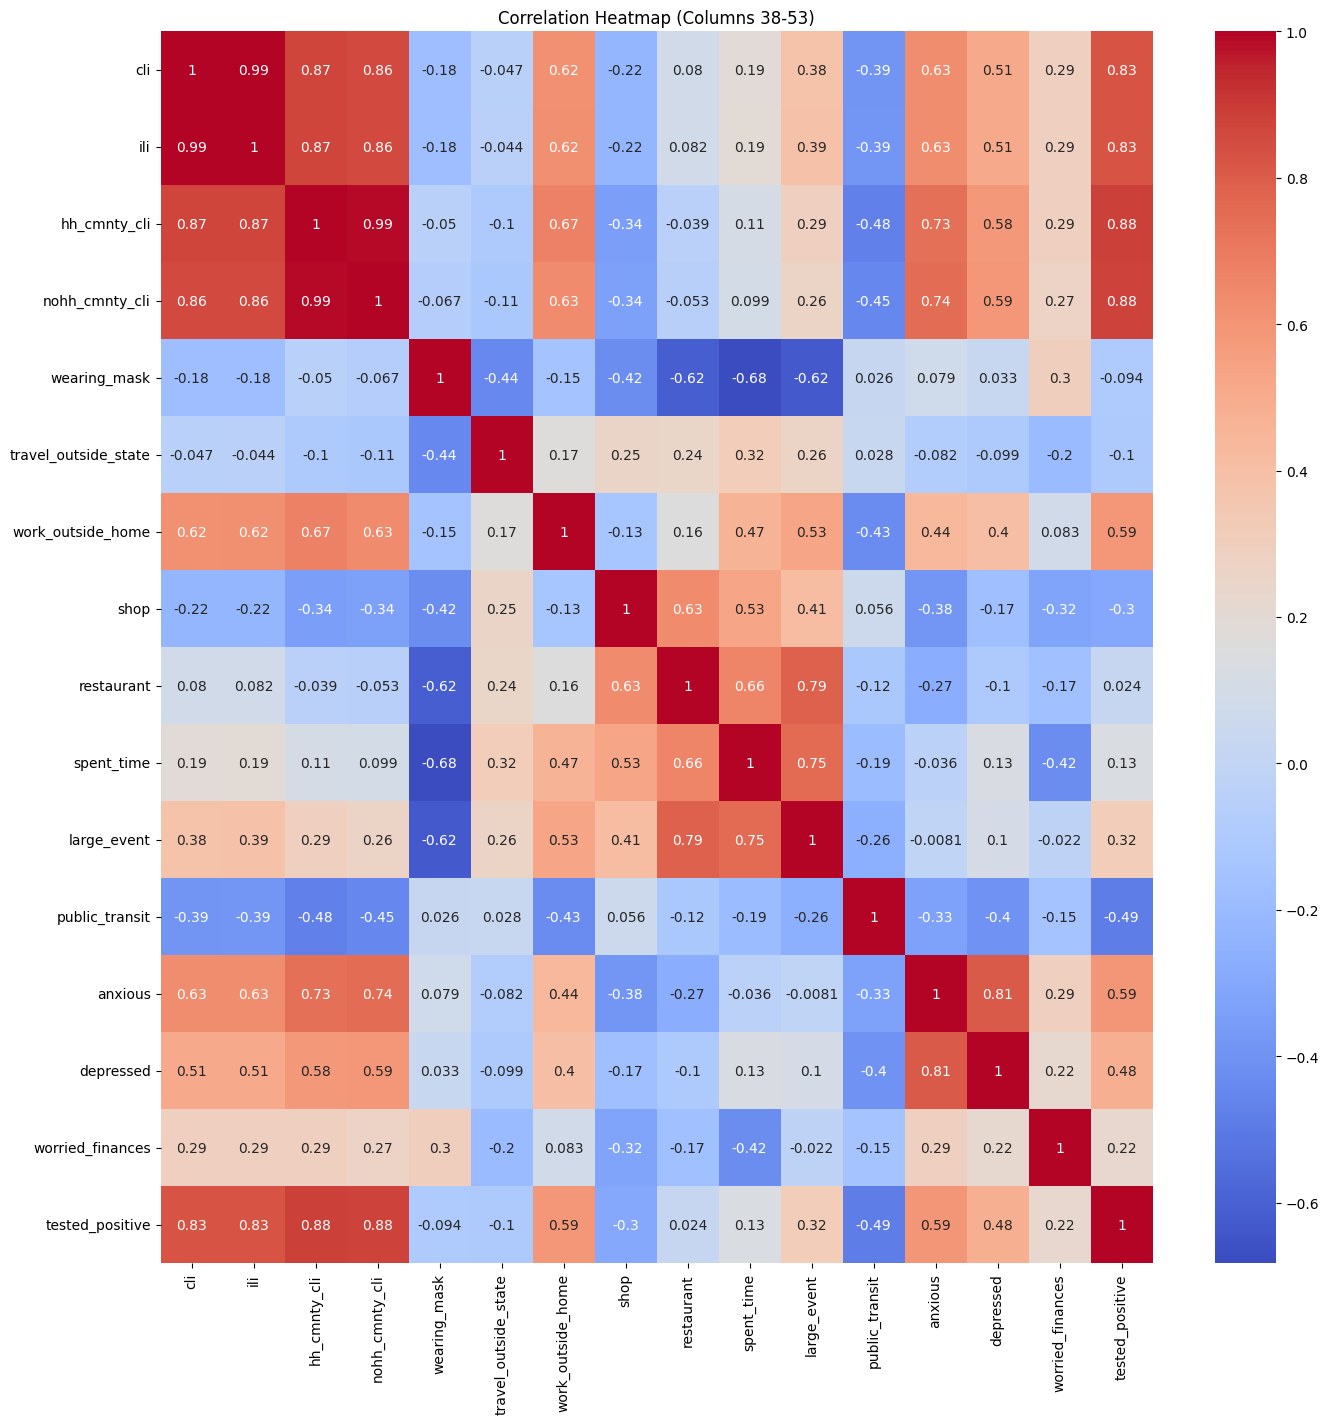

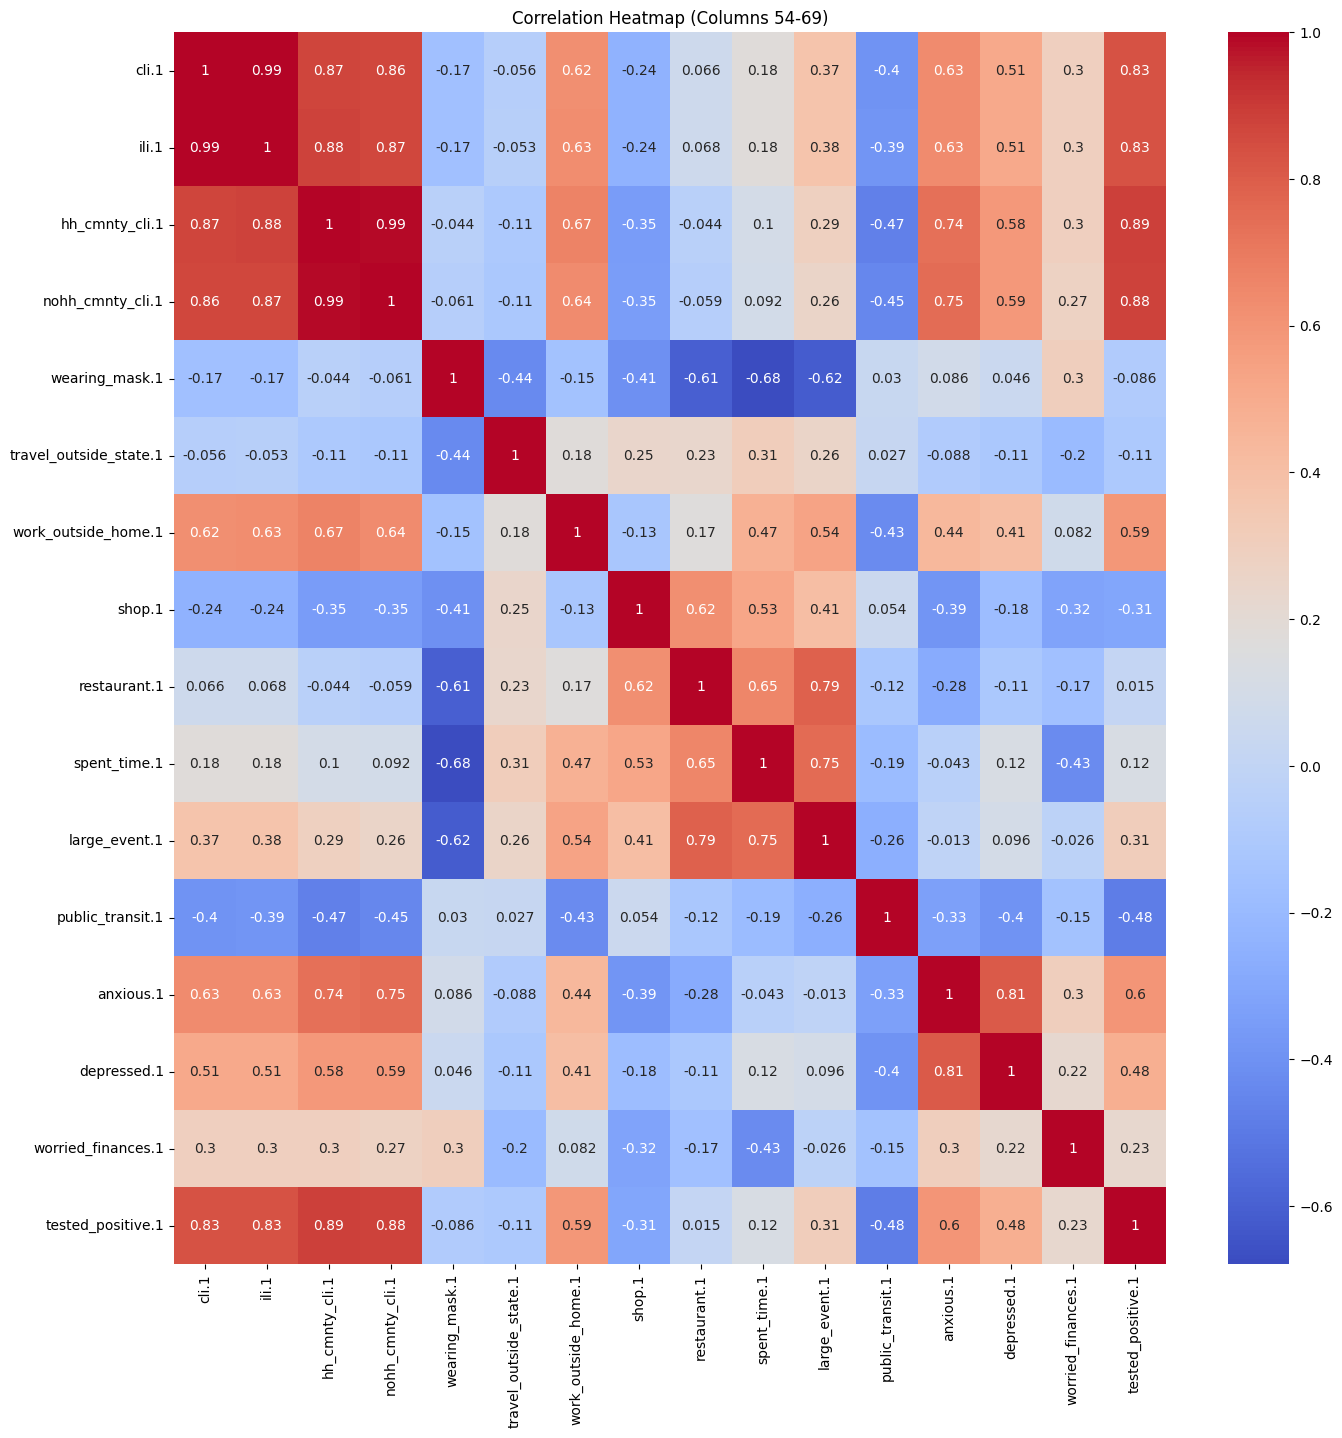

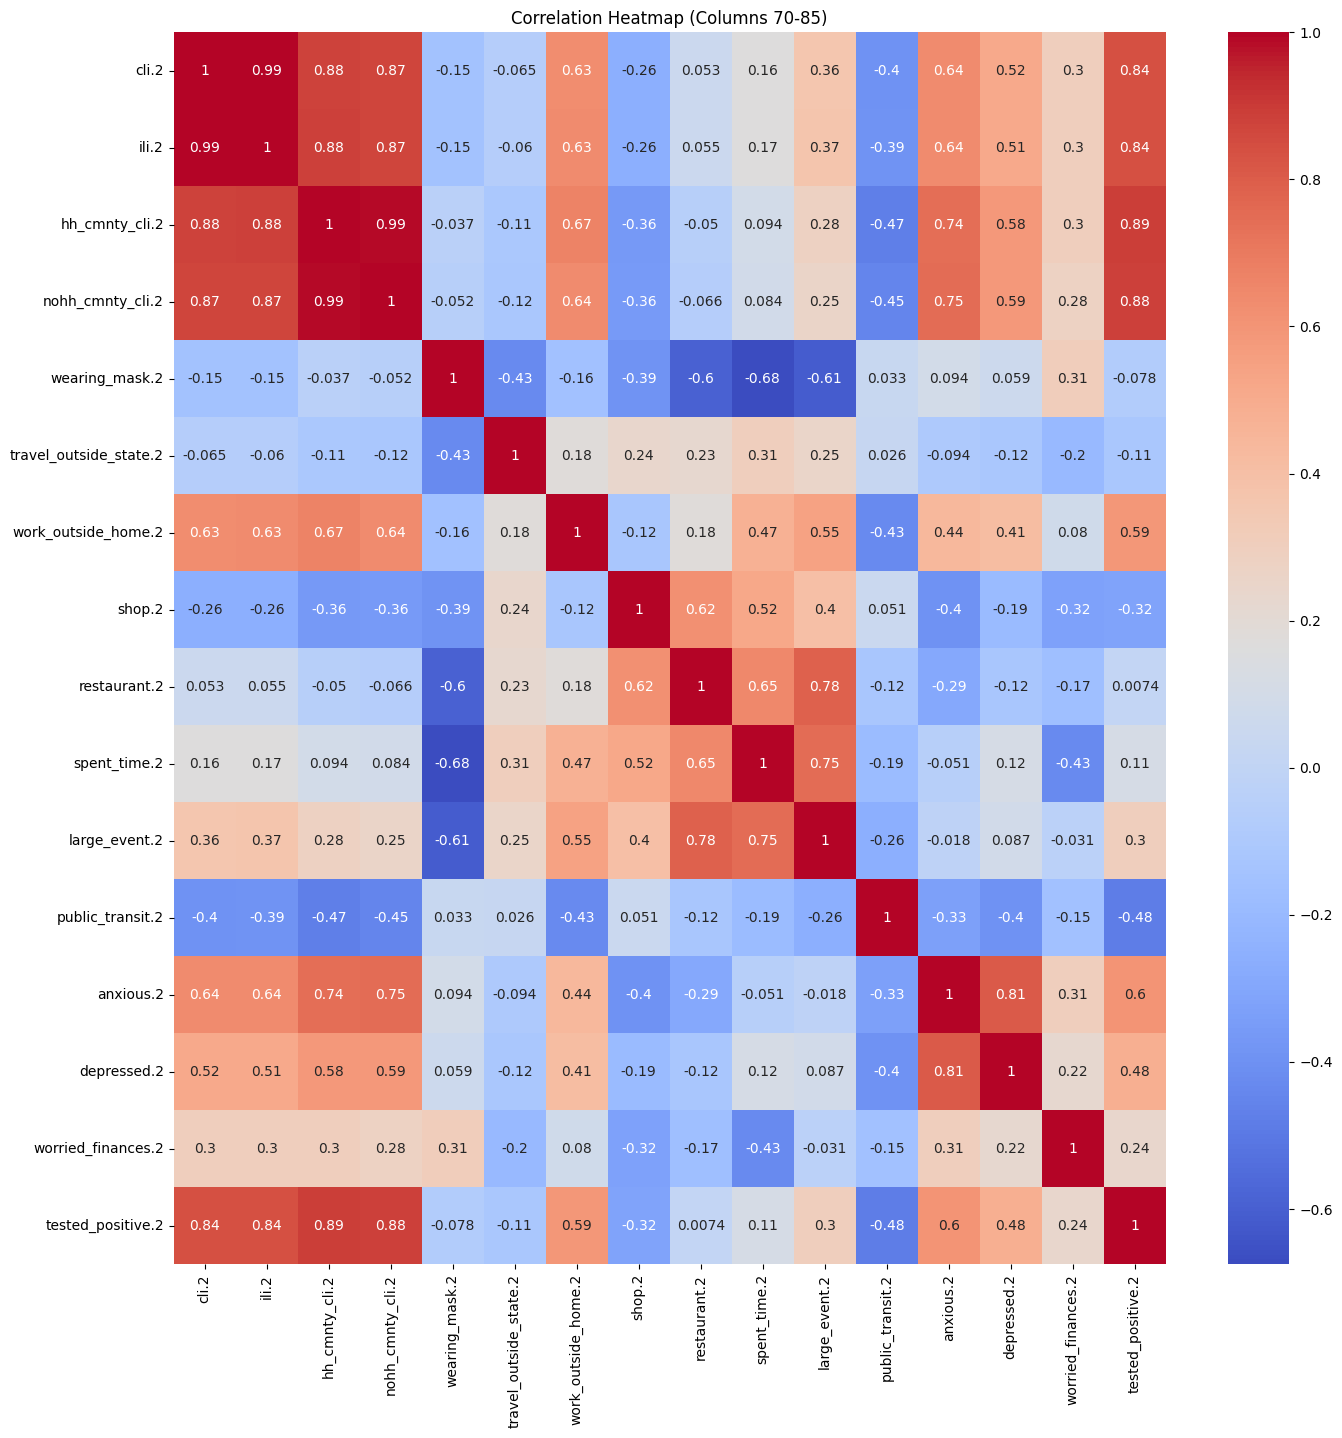

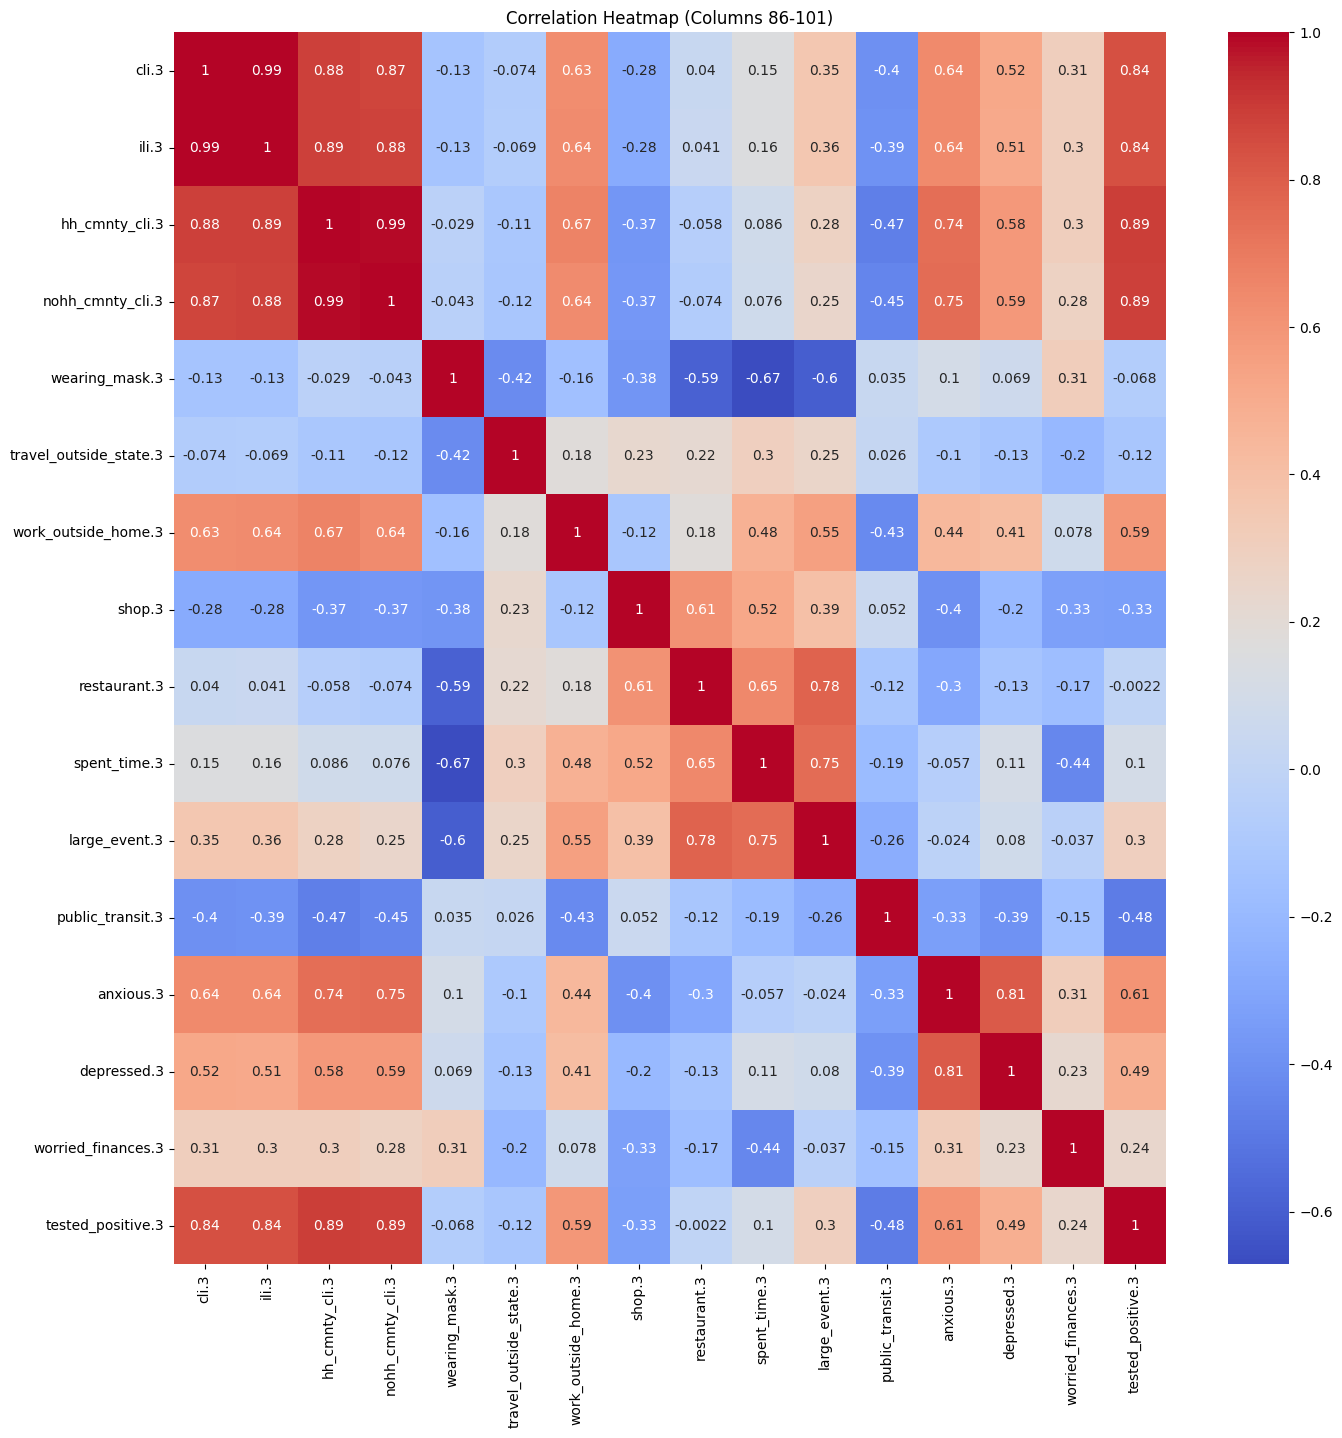

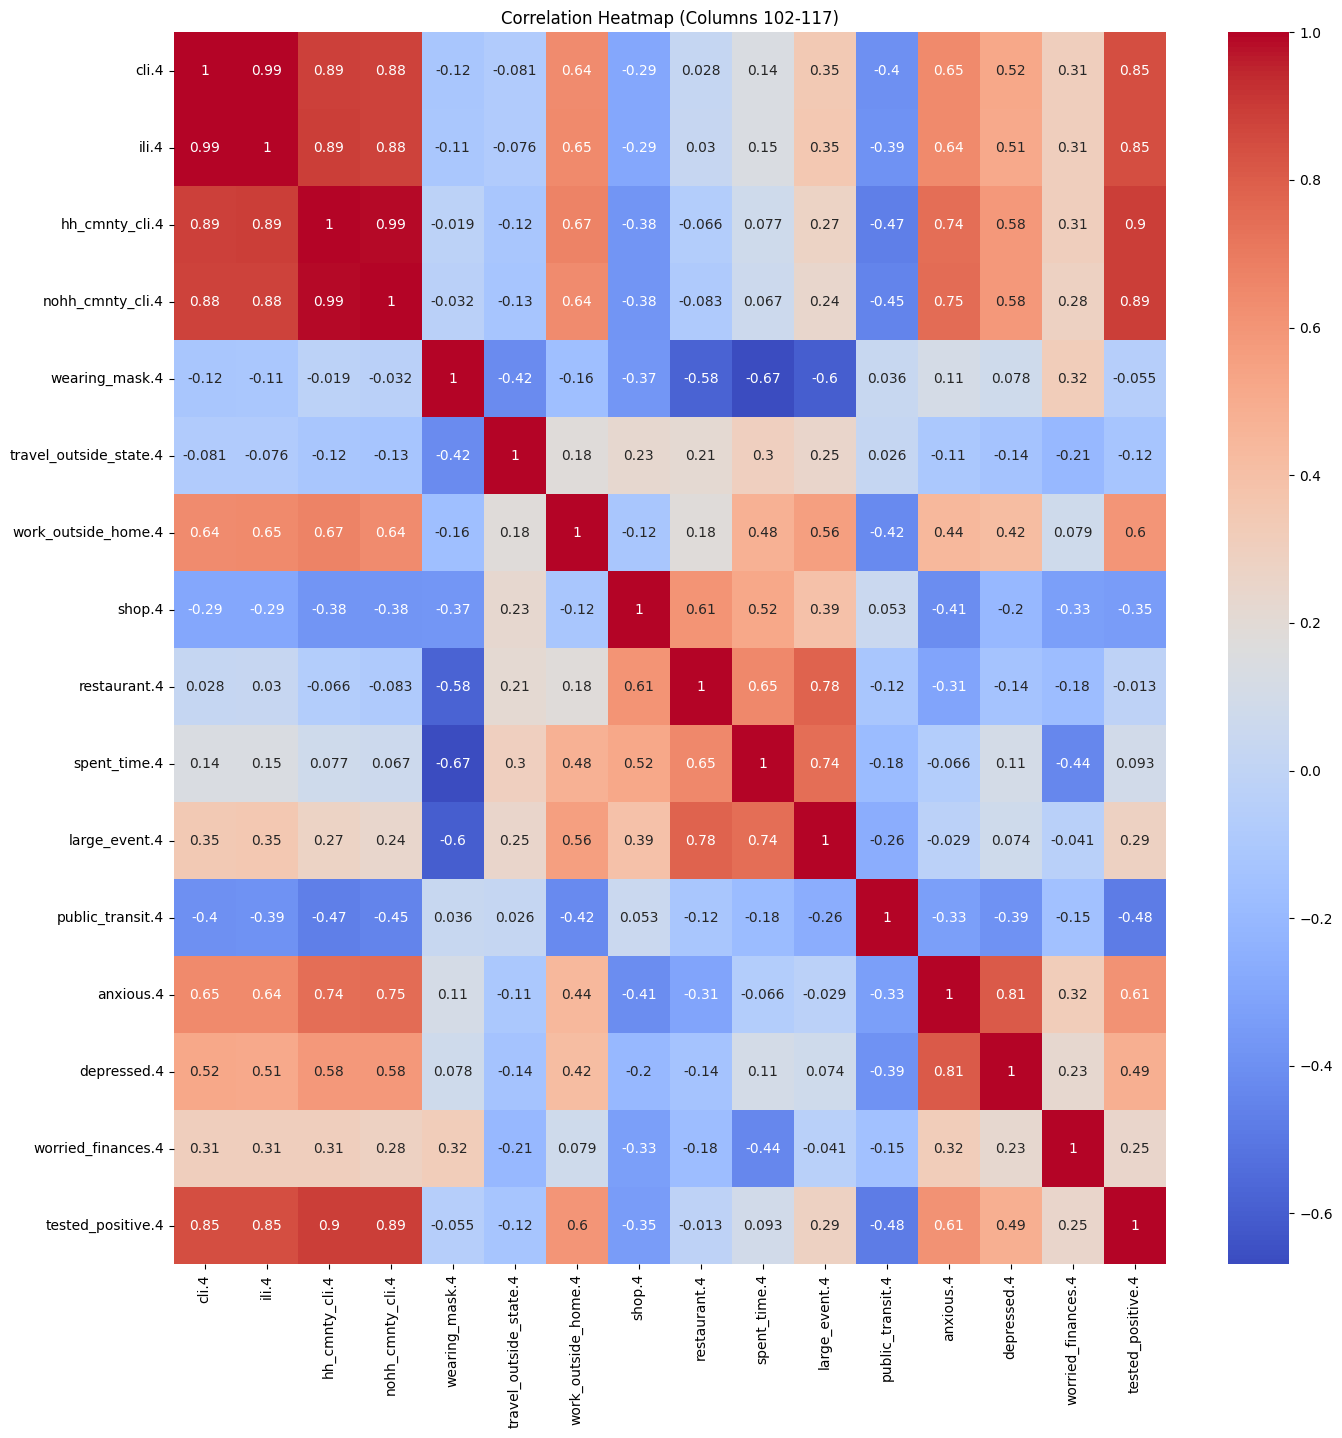

In [353]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for start_col in range(37, 117, 16):
    end_col = start_col + 16
    
    # 选择当前范围内的列
    selected_columns_indices = list(range(start_col, end_col))
    df_selected = df.iloc[:, selected_columns_indices]

    # 计算相关性矩阵
    correlation_matrix = df_selected.corr(method='spearman')

    # 使用热图可视化相关性
    plt.figure(figsize=(16, 16))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap (Columns {start_col+1}-{end_col})')
    plt.show()


通过分析上面相关性图，先选择强相关的特征

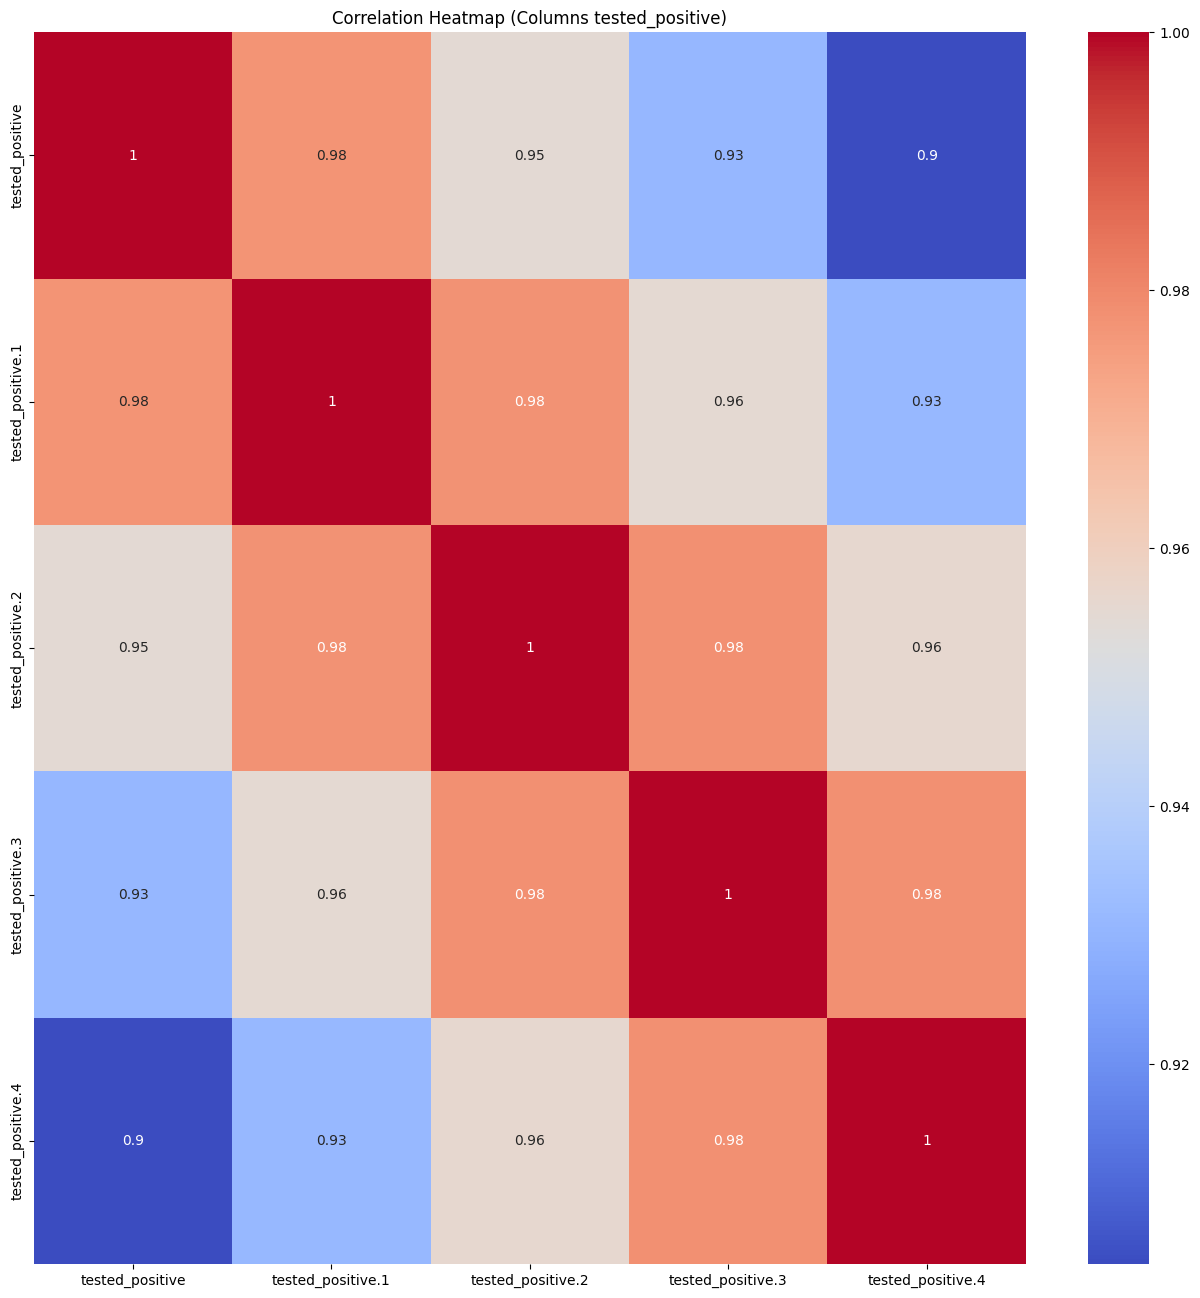

In [354]:
selected_columns_indices = list(range(start_col, end_col))
df_selected = df.iloc[:, [52,68,84,100,116]]

# 计算相关性矩阵
correlation_matrix = df_selected.corr(method='spearman')

# 使用热图可视化相关性
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title(f'Correlation Heatmap (Columns tested_positive)')
plt.show()

## 特征选择

In [355]:
def select_feat(train_data, valid_data, test_data, select_all=True):
    '''Selects useful features to perform regression'''
    y_train, y_valid = train_data[:,-1], valid_data[:,-1]   # 此处train_data和valid_data为未分离特征值和标签的数据。
    raw_x_train, raw_x_valid, raw_x_test = train_data[:,:-1], valid_data[:,:-1], test_data   # 标签y取最后一列，特征x取前面的所有列。
    
    if select_all:   # 当选取所有特征作为训练数据时。
        feat_idx = list(range(raw_x_train.shape[1]))   # raw_x_train.shape=[条目数, 特征数]，取特征数的维度数作为特征总数。
    else:   # 当选取部分特征(用户自定义)作为训练数据时。
        # TODO: Select suitable feature colums.
        feat_idx = list(range(0,37))
        for i in range(5):
            feat_idx += list(range(37+i*16, 41+i*16))
            feat_idx += [43+i*16]
            feat_idx += list(range(48+i*16, 52+i*16))
        
    return raw_x_train[:,feat_idx], raw_x_valid[:,feat_idx], raw_x_test[:,feat_idx], y_train, y_valid

In [356]:
list(range(37,41))

[37, 38, 39, 40]

In [357]:
# 导入数值运算包
import math
import numpy as np
 
# 导入文件读写包
import pandas as pd
import os
import csv
 
# 导入进度条功能包
from tqdm import tqdm
 
# 导入PyTorch包及所需的附属模块
import torch
import torch.nn as nn   # torch.nn是构建神经网络(neural network, nn)的常用模块。
from torch.utils.data import Dataset, DataLoader, random_split
 
# 导入学习曲线绘制模块
from torch.utils.tensorboard import SummaryWriter

## 构建工具

In [358]:
def same_seed(seed): 
    '''Fixes random number generator seeds for reproducibility.'''
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

def train_valid_split(data_set, valid_ratio, seed):
    '''Split provided training data into training set and validation set'''
    valid_set_size = int(valid_ratio * len(data_set)) 
    train_set_size = len(data_set) - valid_set_size
    train_set, valid_set = random_split(data_set, [train_set_size, valid_set_size], generator=torch.Generator().manual_seed(seed))
    return np.array(train_set), np.array(valid_set)

def predict(test_loader, model, device):
    model.eval() # Set your model to evaluation mode.
    preds = []
    for x in tqdm(test_loader):
        x = x.to(device)                        
        with torch.no_grad():                   
            pred = model(x)                     
            preds.append(pred.detach().cpu())   
    preds = torch.cat(preds, dim=0).numpy()  
    return preds

## 处理数据集

In [359]:
class COVID19Dataset(Dataset):
    '''
    x: Features.
    y: Targets, if none, do prediction.
    '''
    def __init__(self, x, y=None):
        if y is None:
            self.y = y
        else:
            self.y = torch.FloatTensor(y)
        self.x = torch.FloatTensor(x)

    def __getitem__(self, idx):
        if self.y is None:
            return self.x[idx]
        else:
            return self.x[idx], self.y[idx]

    def __len__(self):
        return len(self.x)

## 编写网络

In [360]:
class MyModel(nn.Module):
    def __init__(self, input_dim):
        super(MyModel, self).__init__()
        # TODO: modify model's structure, be aware of dimensions.
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )   # 设置模型层次
        
    def forward(self, x):
        x = self.layers(x)   # 令数据x输入模型各层次，得到输出x。
        x = x.squeeze(1)
        return x

## 训练过程

In [361]:
def trainer(train_loader, valid_loader, model, config, device):
    criterion = nn.MSELoss(reduction='mean')   # Define your loss function, do not modify this.
    # Define your optimization algorithm.
    # TODO: Please check https://pytorch.org/docs/stable/optim.html to get more available algorithms.
    # TODO: L2 regularization (optiminzer(weight decay...) or implement by yourself).
    optimizer = torch.optim.Adam(model.parameters(), lr=config['learning_rate'])
   
    
    writer = SummaryWriter()   # Writer of tensorboard.
    
    if not os.path.isdir('./models'):   # 此处利用os.path.isdir()函数判断模型存储路径是否存在，以避免os.mksir()函数出错。
        os.mkdir('./models')   # Create directory of saving models.
    
    # 此处定义模型训练的总轮数(n_epochs)以及一系列用于计数的变量(best_loss, step, early_stop_count)。
    n_epochs, best_loss, step, early_stop_count = config['n_epochs'], math.inf, 0, 0
    # best_loss = math.inf 返回浮点数正无穷(+∞)
 
    train_pbar = tqdm(range(n_epochs), position=0, leave=True)
    
    for epoch in train_pbar:
        model.train() # Set your model to train mode.
        loss_record = []
        
        # tqdm is a package to visualize your training progress.
        # train_pbar = tqdm(train_loader, position=0, leave=True)
        # position=0可以防止多行进度条的情况（？说实话，还是不够清楚理解）。
        
        for x, y in train_loader:
            optimizer.zero_grad()   # Start gradient to zero.
            x, y = x.to(device), y.to(device)   # data.to()函数将数据移至指定设备(CPU/GPU)。
            pred = model(x)
            loss = criterion(pred, y) 
            loss.backward()   # Compute gradient (backpropagation).
            optimizer.step()   # Update parameters.
            step += 1
            loss_record.append(loss.detach().item())
            # 使用PyTorch时，特别需要清楚每个变量的数据类型并在需要时进行变量的拷贝和转换(尤其是在遇到tensor数据类型时)。
            
 
        
        mean_train_loss = sum(loss_record)/len(loss_record)
        writer.add_scalar('Loss/train', mean_train_loss, step)
        
        model.eval()   # Set your model to evaluation mode.
        loss_record = []
        for x, y in valid_loader:
            x, y = x.to(device), y.to(device)
            with torch.no_grad():   
            # 注意，我们只在train模式下才会计算梯度，在validation和test模式下都需要通过torch.no_grad()把torch调整到非梯度模式。
                pred = model(x)
                loss = criterion(pred, y)
            
            loss_record.append(loss.detach().item())
        
        mean_valid_loss = sum(loss_record)/len(loss_record)
        # print(f'Epoch [{epoch+1}/{n_epochs}]: Train_loss: {mean_train_loss:.4f}, Valid loss: {mean_valid_loss:.4f}')
        writer.add_scalar('Loss/valid', mean_valid_loss, step)
        
        if mean_valid_loss < best_loss:   # 将最佳loss值更新到best_loss变量中。
            best_loss = mean_valid_loss
            torch.save(model.state_dict(), config['save_path'])   # 保存当前步骤的最佳model。
            # print('Saving model with loss {:.3f}...'.format(best_loss))
            early_stop_count = 0
        else:
            early_stop_count += 1   # 记录模型未能优化的次数，为模型收敛中断训练提供参考。
        
        # Display current epoch number and loss on tqdm progress bar.
        train_pbar.set_description(f'Epoch [{epoch+1}/{n_epochs}]')
        train_pbar.set_postfix({'Best loss' : '{0:1.5f}'.format(best_loss)})
        
        if early_stop_count >= config['early_stop']:
            print('\nModel is not improving, so we halt the training session.')
            return None

In [362]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
config = {
    'seed': 5201314,   # Your seed number, you can pick your lucky number. :)
    'select_all': False,   # Whether to use all features.
    'valid_ratio': 0.2,   # validation_size = train_size * valid_ratio
    'n_epochs': 6000,   # Number of epochs.
    'batch_size': 256,
    'learning_rate': 1e-5,
    'early_stop': 400,   # if model has not improved for this many consecutive epochs, stop training.
    'save_path': './models/model.ckpt'   # Your model will be saved here.
}

In [363]:
# Set seed for reproducibility
same_seed(config['seed'])   # same_seed()函数指定numpy和torch的seed
 
 
# train_data size: 2699 x 118 (id + 37 states + 16 features x 5 days)
# test_data size: 1078 x 117 (without last day's positive rate)
# DataFrame.values变量返回DataFrame的numpy_array数据（去除表头）
# btw. 若只需要获取表头，则可使用DataFrame.columns变量
train_data, test_data = pd.read_csv("/kaggle/input/ml2022spring-hw1/covid.train.csv").values, pd.read_csv("/kaggle/input/ml2022spring-hw1/covid.test.csv").values
train_data, valid_data = train_valid_split(train_data, config['valid_ratio'], config['seed'])
 
# Print out the data size.
print(f""""train_data size: {train_data.shape}
valid_data size: {valid_data.shape}
test_data size: {test_data.shape}""")
 
# Select features
x_train, x_valid, x_test, y_train, y_valid = select_feat(train_data, valid_data, test_data, select_all=config['select_all'])
 
# Print out the number of features
print(f'number of features: {x_train.shape[1]}')
 
train_dataset, valid_dataset, test_dataset = COVID19Dataset(x_train, y_train), \
                                             COVID19Dataset(x_valid, y_valid), \
                                             COVID19Dataset(x_test)
 
# PyTorch dataloader loads pytorch dataset into batches.
train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True, pin_memory=True)   
# pin_memory=True意为将内存读取设置为「锁页模式」以减少时间开销。
valid_loader = DataLoader(valid_dataset, batch_size=config['batch_size'], shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=True, pin_memory=True)

"train_data size: (2160, 118)
valid_data size: (539, 118)
test_data size: (1078, 117)
number of features: 82


In [364]:
model = MyModel(input_dim=x_train.shape[1]).to(device)   # 将模型送入训练数据所在设备(CPU/GPU)。
trainer(train_loader, valid_loader, model, config, device)

Epoch [3638/6000]:  61%|██████    | 3637/6000 [02:27<01:35, 24.62it/s, Best loss=1.55725]


Model is not improving, so we halt the training session.


In [365]:
%reload_ext tensorboard
%tensorboard --logdir=./runs/

Reusing TensorBoard on port 6006 (pid 307), started 0:49:20 ago. (Use '!kill 307' to kill it.)

In [366]:
def save_pred(preds, file):
    '''Save predictions to specified file'''
    with open(file, 'w') as fp:
        writer = csv.writer(fp)
        writer.writerow(['id', 'tested_positive'])
        for i, p in enumerate(preds):
            writer.writerow([i, p])
 
model = MyModel(input_dim=x_train.shape[1]).to(device)
model.load_state_dict(torch.load(config['save_path']))   # 从state_dict文件读取模型信息
preds = predict(test_loader, model, device)
save_pred(preds, '/kaggle/working/pred.csv')

100%|██████████| 5/5 [00:00<00:00, 552.07it/s]
